In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
2762,21,female,32.680,2,no,northwest,26018.95052
2763,51,male,37.000,0,no,southwest,8798.59300
2764,22,female,31.020,3,yes,southeast,35595.58980
2765,47,male,36.080,1,yes,southeast,42211.13820
2766,18,male,23.320,1,no,southeast,1711.02680
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum() #since there is no any null values, we dont need to drop or add any values.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.corr() 

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


In [15]:
df[['age','charges']].corr()

,age,charges
age,1.000000,0.298624
charges,0.298624,1.000000


In [17]:
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.199846
charges,0.199846,1.000000


In [51]:
df[['children','charges']].corr()

,children,charges
children,1.000000,0.066442
charges,0.066442,1.000000


In [39]:
df.groupby(['children','age'],as_index=False).mean() 

,children,age,bmi,charges
0,0,18,32.081111,6621.917162
1,0,19,29.026100,10211.375025
2,0,20,29.748235,7927.985929
3,0,21,31.494412,2807.112992
4,0,22,30.105278,5814.593892
...,...,...,...,...
214,5,43,25.520000,14478.330150
215,5,45,24.310000,9788.865900
216,5,46,25.800000,10096.970000
217,5,49,31.900000,11552.904000


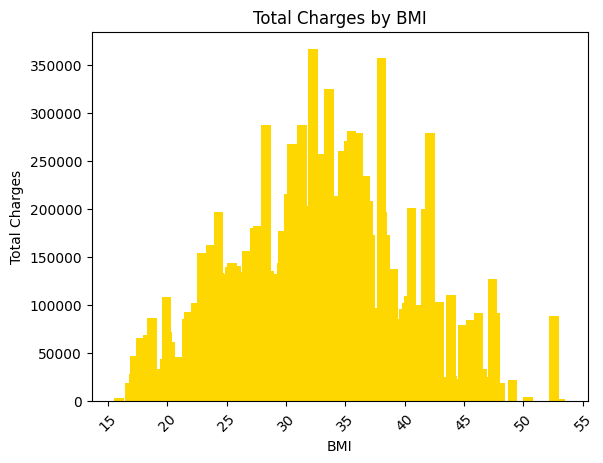

In [56]:
# Calculate the total charges by BMI
charges_by_bmi = df.groupby('bmi')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_bmi.index, charges_by_bmi.values, color='gold')

# Add labels and title
plt.xlabel('BMI')

plt.ylabel('Total Charges')
plt.title('Total Charges by BMI')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()
#The bar chart shows that total charges vary widely across different BMI values,
#with several peaks indicating higher total charges at certain BMI levels.


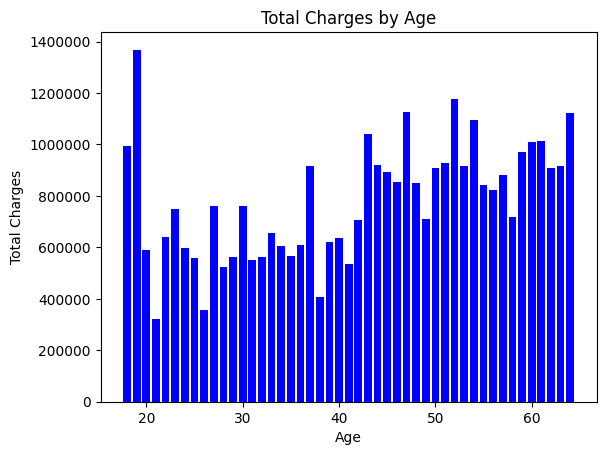

In [64]:
# Calculate the total charges by age
charges_by_age = df.groupby('age')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_age.index, charges_by_age.values, color='blue')

# Add labels and title
plt.xlabel('Age')

plt.ylabel('Total Charges')
plt.title('Total Charges by Age')
plt.ticklabel_format(style='plain')
# Display the chart
plt.show()
#The bar chart suggests total healthcare charges tend to increase with age.
#There are higher charges in the early 20s and again in the 60s.

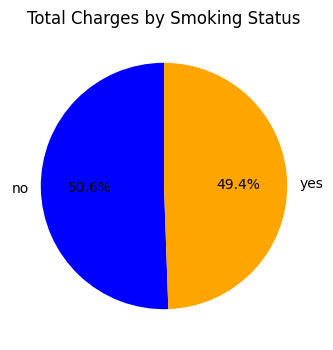

In [67]:
# Calculate the total charges by smoking status
charges_by_smoker = df.groupby('smoker')['charges'].sum()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(charges_by_smoker, labels=charges_by_smoker.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

# Add title
plt.title('Total Charges by Smoking Status')

# Show the chart
plt.show()
#The pie chart shows an almost even split in total charges between smokers and non-smokers, 
#with smokers slightly less, highlighting the higher impact of smoking status on insurance costs.

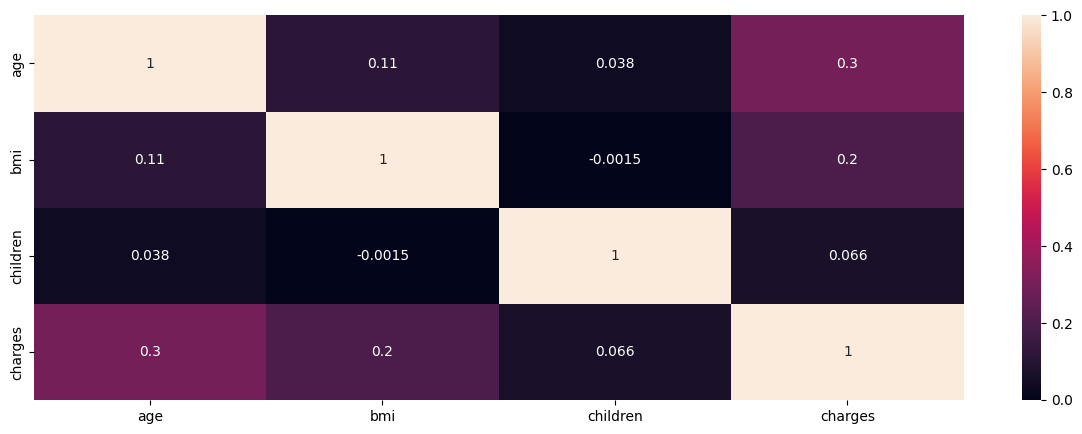

In [69]:
auto = df[['age','bmi','children','charges']]
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()